# Residual Analysis


Residuals are the differences between the observed actual values (y_test) and the predicted values (y_pred) from the model. Mathematically, residuals are computed as


Residual=Actual Value−Predicted Value


Residuals help us understand how well the model is performing. A good model will have residuals that are randomly distributed and do not show any systematic pattern.

# Why Perform Residual Analysis?

Residual analysis helps to check if the underlying assumptions of regression are satisfied. The key assumptions of a linear regression model are:

Linearity: The relationship between the independent variables and the dependent variable is linear.
    
Independence: The residuals should be independent of each other.
    
Homoscedasticity: The residuals should have constant variance (i.e., no patterns in the spread of residuals).
    
Normality: The residuals should be normally distributed (particularly important for hypothesis testing and confidence intervals).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#step load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print(df.head())

X=df.drop('Price',axis=1)
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


**Residuals**

In [6]:
residuals=y_test-y_pred
print("\n First 5 residuals:")
print(pd.DataFrame({'Actual':y_test[:5],'predicted':y_pred[:5],'Residuals':residuals[:5]}))


 First 5 residuals:
        Actual  predicted  Residuals
20046  0.47700   0.719123  -0.242123
3024   0.45800   1.764017  -1.306017
15663  5.00001   2.709659   2.290351
20484  2.18600   2.838926  -0.652926
9814   2.78000   2.604657   0.175343


**scatter plot**

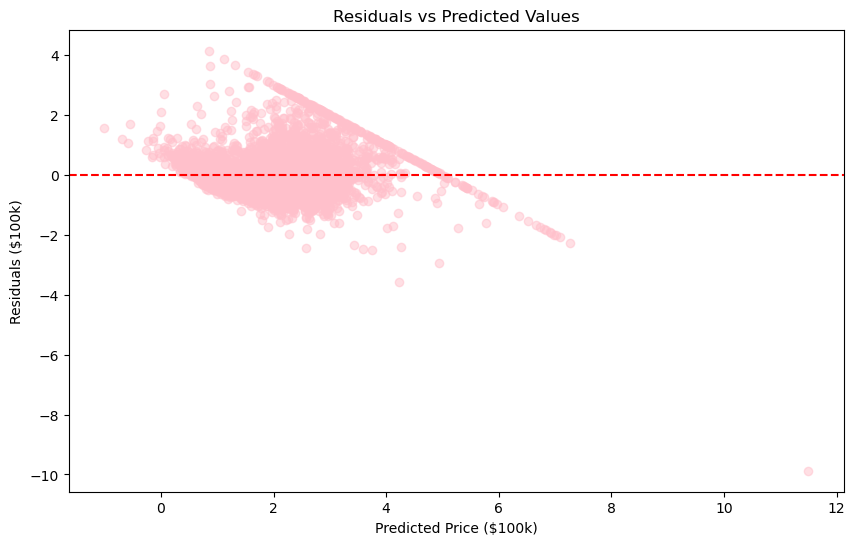

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='pink', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Price ($100k)')
plt.ylabel('Residuals ($100k)')
plt.show()


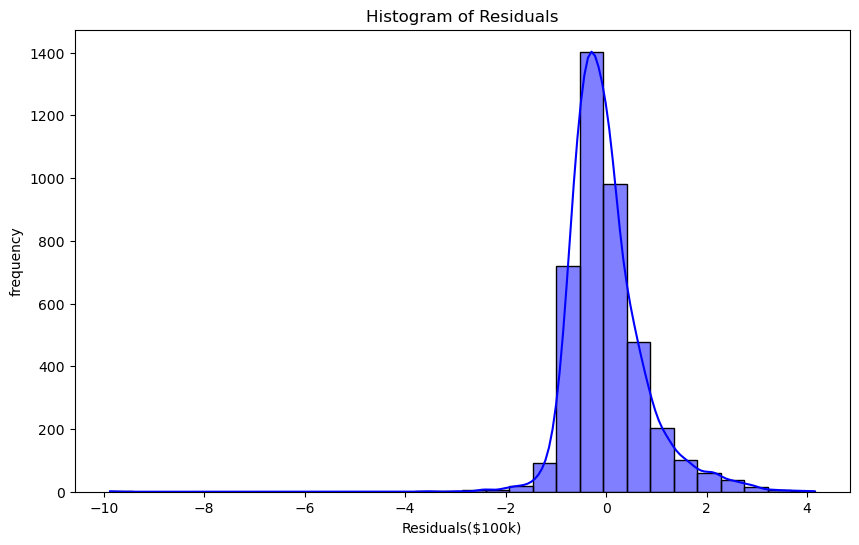

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals($100k)')
plt.ylabel('frequency')
plt.show()

**Good**:Bell-shaped curve(normal)


**Bad**:Big Deviations

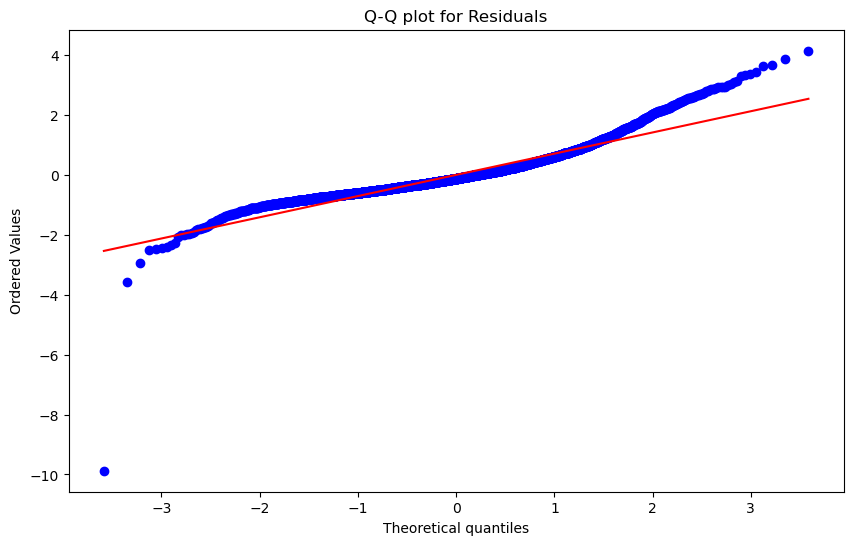

In [15]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist="norm",plot=plt)
plt.title("Q-Q plot for Residuals")
plt.show()

# RESIDUALS

**Step 4:Intercept Residual Analysis**

1. **Linearity:** The absence of strong curvature indicates that a linear model is appropriate for the data, meaning the relationship between predictors and the outcome is well-captured by the model.
  
2. **Constant Variance:** The consistent spread of residuals across predicted values suggests that the model doesn't suffer from heteroscedasticity, making it more reliable for prediction.




3. **Normality:** Residuals roughly following a normal distribution imply that the model's errors are random, supporting the validity of statistical tests and confidence intervals.

# Standardization v/s Normalization 

**Standardization vs. Normalization**

1. **Standardization**  
   - **Definition:** Standardization (or Z-score normalization) is the process of transforming data to have a mean of 0 and a standard deviation of 1. It’s used when the data follows a Gaussian (normal) distribution and when features have different scales or units.
   - **Formula:** 
   Z = X-mu/sigma
                 
     Where:  
     - Z is the standardized value  
     - X  is the original value  
     - mu is the mean of the data  
     - sigma is the standard deviation of the data

2. **Normalization**  
   - **Definition:** Normalization (or Min-Max scaling) is the process of scaling data to a fixed range, usually between 0 and 1. It is used when the data doesn't follow a Gaussian distribution and when features need to be scaled to the same range.
   - **Formula:**  
   
       Xnorm=X-Xmin/Xmax-Xmin
       
     Where:  
     - X norm is the normalized value  
     - X  is the original value  
     - Xmin is the minimum value of the data  
     - Xmax is the maximum value of the data

# Cross-Validation: A Technique for Model Performance Evaluation

**Definition:**

Cross-validation is a technique used to assess the performance and generalizability of a machine learning model. It involves splitting the dataset into multiple subsets or folds and training and testing the model multiple times to ensure that the model’s performance is consistent across different portions of the data. This helps in detecting overfitting and provides a more reliable estimate of model performance.

**Why Use Cross-Validation?**

Reduces bias associated with random sampling.

Helps in detecting overfitting and ensures that the model generalizes well to unseen data.

Provides a more robust estimate of model performance compared to a single train-test split.

**ormula for Cross-Validation Performance**
performance metric for fold 
𝑖
i is 
𝑃
𝑖
P 
i
​
 . The overall cross-validation performance 
𝑃
cv
P 
cv
​
  is:

𝑃
cv
=
1
𝐾
∑
𝑖
=
1
𝐾
𝑃
𝑖
P 
cv
​
 = 
K
1
​
  
i=1
∑
K
​
 P 
i
​
 
Where:

𝐾
K is the number of folds


𝑃
𝑖
P 
i
​
  is the performance metric for the 
𝑖
i-th fold

# K-Fold Cross-Validation:

The data is split into K equal-sized folds (subsets).

The model is trained on K-1 folds and tested on the remaining fold.

This process is repeated K times, each time with a different fold as the test set.

The performance metrics (e.g., accuracy, F1 score) are averaged to get the final model performance.

In [17]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X,y=make_regression(n_samples=100,n_features=2,noise=20)

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

scores=cross_val_score(model,X,y,cv=kf,scoring='r2')
print("Cross validation scores:",scores)
print("Average score",scores.mean())

Cross validation scores: [0.96963773 0.92935702 0.93839065 0.96428874 0.97463179]
Average score 0.9552611858597789


# Ridge Regression 

**Ridge Regression:**

Ridge regression is a type of linear regression that helps make a model simpler and more reliable by adding a penalty to the model's coefficients (the numbers that multiply the features). This penalty discourages the model from fitting too closely to the training data, which can reduce overfitting (where the model becomes too complex and performs poorly on new data).


In ridge regression, the model tries to minimize two things:


The usual error (how far off the predictions are).
The size of the model's coefficients (keeping them small).
This is done by adding a "regularization" term to the usual cost function, controlled by a parameter (
𝜆
λ), which determines how much the coefficients should be shrunk.


**In short**: Ridge regression helps prevent overfitting by keeping the model from becoming too complex. It does this by adding a penalty for having large coefficients.